<a href="https://colab.research.google.com/github/vivek-VU21CSEN0100359/OIBSIP/blob/main/Project_4_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/content/sample_data/Twitter_Data.csv')
print(df.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [3]:
def preprocess_tweet(tweet):
    # Ensure tweet is a string
    tweet = str(tweet) if not pd.isna(tweet) else ""
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags (optional, keep if needed for sentiment analysis, otherwise remove)
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove digits
    tweet = re.sub(r'\d+', '', tweet)
    # Remove non-word characters and extra spaces
    tweet = re.sub(r'\W+', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Apply preprocessing
df['cleaned_text'] = df['clean_text'].apply(preprocess_tweet)
df['cleaned_text'].fillna("missing", inplace=True)

# Handling missing values in the 'category' column
df.dropna(subset=['category'], inplace=True)
df['category'] = df['category'].astype(int)

print(df[['cleaned_text', 'category']].head())

                                        cleaned_text  category
0  when modi promised minimum government maximum ...        -1
1  talk all the nonsense and continue all the dra...         0
2  what did just say vote for modi welcome bjp to...         1
3  asking his supporters prefix chowkidar their n...         1
4  answer who among these the most powerful world...         1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['category'], test_size=0.2, random_state=42)

In [5]:
cvectorizer = CountVectorizer()
X_train_vectorized = cvectorizer.fit_transform(X_train)
X_test_vectorized = cvectorizer.transform(X_test)

In [6]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)
y_pred = nb_classifier.predict(X_test_vectorized)

In [7]:
print("Classification Report (ML-based):")
print(classification_report(y_test, y_pred))
print("Accuracy Score (ML-based):")
print(accuracy_score(y_test, y_pred))

Classification Report (ML-based):
              precision    recall  f1-score   support

          -1       0.75      0.62      0.68      7230
           0       0.91      0.62      0.74     10961
           1       0.69      0.92      0.79     14404

    accuracy                           0.75     32595
   macro avg       0.78      0.72      0.74     32595
weighted avg       0.78      0.75      0.75     32595

Accuracy Score (ML-based):
0.7525387329344991


In [8]:
cvectorizer = CountVectorizer(ngram_range=(1, 4))
X_train_vectorized = cvectorizer.fit_transform(X_train)
X_test_vectorized = cvectorizer.transform(X_test)
nb_classifier.fit(X_train_vectorized, y_train)
y_pred = nb_classifier.predict(X_test_vectorized)

print("Classification Report (ML-based with n-grams):")
print(classification_report(y_test, y_pred))
print("Accuracy Score (ML-based with n-grams):")
print(accuracy_score(y_test, y_pred))

Classification Report (ML-based with n-grams):
              precision    recall  f1-score   support

          -1       0.87      0.23      0.36      7230
           0       0.90      0.29      0.44     10961
           1       0.52      0.98      0.68     14404

    accuracy                           0.58     32595
   macro avg       0.76      0.50      0.49     32595
weighted avg       0.73      0.58      0.53     32595

Accuracy Score (ML-based with n-grams):
0.5801810093572634


In [9]:
vectorizertf = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X_train_vectorized = vectorizertf.fit_transform(X_train)
X_test_vectorized = vectorizertf.transform(X_test)
nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(X_train_vectorized, y_train)
y_pred = nb_classifier.predict(X_test_vectorized)

print("Classification Report (ML-based with TF-IDF and trigrams):")
print(classification_report(y_test, y_pred))
print("Accuracy Score (ML-based with TF-IDF and trigrams):")
print(accuracy_score(y_test, y_pred))

Classification Report (ML-based with TF-IDF and trigrams):
              precision    recall  f1-score   support

          -1       0.85      0.47      0.61      7230
           0       0.85      0.72      0.78     10961
           1       0.69      0.92      0.79     14404

    accuracy                           0.75     32595
   macro avg       0.80      0.70      0.72     32595
weighted avg       0.78      0.75      0.74     32595

Accuracy Score (ML-based with TF-IDF and trigrams):
0.7531830035281485


In [10]:
cvectorizer = CountVectorizer()
X = cvectorizer.fit_transform(df['cleaned_text'])
y = df['category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.73      0.63      0.68      7230
           0       0.91      0.63      0.74     10961
           1       0.70      0.90      0.79     14404

    accuracy                           0.75     32595
   macro avg       0.78      0.72      0.74     32595
weighted avg       0.77      0.75      0.75     32595

Accuracy: 0.7514649486117503


In [11]:
LR=LogisticRegression()
LR.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
LR_pred = LR.predict(X_test_vectorized)

In [13]:
print("Classification Report (Logistic regression):")
print(classification_report(y_test, LR_pred))
print("Accuracy Score (Logistic regression):")
print(accuracy_score(y_test, LR_pred))

Classification Report (Logistic regression):
              precision    recall  f1-score   support

          -1       0.90      0.79      0.84      7230
           0       0.89      0.97      0.93     10961
           1       0.93      0.92      0.92     14404

    accuracy                           0.91     32595
   macro avg       0.91      0.89      0.90     32595
weighted avg       0.91      0.91      0.91     32595

Accuracy Score (Logistic regression):
0.9075625095873601


In [14]:
def analyze_tweet_sentiment(tweet, model, vectorizertf):

    tweet_vectorized = vectorizertf.transform([tweet])
    sentiment = model.predict(tweet_vectorized)[0]

    if sentiment == 1:
        return "The sentiment for the previous tweet is positive."
    elif sentiment == 0:
        return "The sentiment for the previous tweet is neutral."
    else:
        return "The sentiment for the previous tweet is negative."

# Example Usage
new_tweet = input("Enter a tweet: ")
print(analyze_tweet_sentiment(new_tweet, LR, vectorizertf))

Enter a tweet: 5
The sentiment for the previous tweet is neutral.


In [15]:
new_tweet = input("Enter a tweet: ")
print(analyze_tweet_sentiment(new_tweet, LR, vectorizertf))

Enter a tweet: 5
The sentiment for the previous tweet is neutral.


In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/sample_data/Twitter_Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [17]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("/content/sample_data/Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [20]:
df.category.value_counts()

,count
category,
1.0,72250
0.0,55213
-1.0,35510


In [21]:
df = df[:][:10000]


df.shape

(10000, 2)

In [22]:
df.category.value_counts()

,count
category,
1.0,4153
0.0,3477
-1.0,2370


In [26]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [27]:
import spacy

nlp = spacy.load("en_core_web_lg")

def preprocess(text):
    list =[]
    for token in nlp(text):
        if token.is_space or token.is_punct or token.is_stop:
            continue
        list.append(token.lemma_)
    return ' '.join(list)

In [28]:
preproccesed_text = []
for text in df['clean_text']:
    preproccesed_text.append(preprocess(str(text)))

df['preprocess'] = preproccesed_text
df.head()

,clean_text,category,preprocess
0,when modi promised “minimum government maximum...,-1.0,modi promise minimum government maximum govern...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,vote modi welcome bjp tell rahul main campaign...
3,asking his supporters prefix chowkidar their n...,1.0,ask supporter prefix chowkidar name modi great...
4,answer who among these the most powerful world...,1.0,answer powerful world leader today trump putin...


In [29]:
# df['preprocess'].value_counts()

In [30]:
df['vector'] = df.preprocess.apply(lambda text: nlp(text).vector)
df.head()

,clean_text,category,preprocess,vector
0,when modi promised “minimum government maximum...,-1.0,modi promise minimum government maximum govern...,"[-0.23454575, 1.2621962, -2.6748037, 1.0117024..."
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi,"[0.017469972, 0.8414817, -2.2772217, -0.224043..."
2,what did just say vote for modi welcome bjp t...,1.0,vote modi welcome bjp tell rahul main campaign...,"[-0.34115997, 0.40232742, -1.246777, -0.261814..."
3,asking his supporters prefix chowkidar their n...,1.0,ask supporter prefix chowkidar name modi great...,"[0.16173057, -0.11361224, 0.15718004, -0.33316..."
4,answer who among these the most powerful world...,1.0,answer powerful world leader today trump putin...,"[0.83706003, 1.21489, -0.66555, 0.40557852, 1...."


In [31]:
df_test = df['category'].replace({-1.0: 1, 0.0: 2, 1.0: 3})

df_test.head()

,category
0,1.0
1,2.0
2,3.0
3,3.0
4,3.0


In [32]:
(df['category'] == None).sum()

0

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['vector'].values, df['category'],test_size= 0.30 , random_state = 42 , stratify= df['category'])

In [34]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [35]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

X_train_scaled = minmax_scaler.fit_transform(X_train_2d)
X_test_scaled = minmax_scaler.transform(X_test_2d)

In [36]:
from sklearn.svm import SVC

model = SVC(C=1, kernel='poly', degree=3, gamma="scale")

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [37]:
from sklearn.metrics import classification_report

print('\n\n\n Classification Report   :\n\n\n ' , classification_report(y_test,y_pred))




 Classification Report   :


                precision    recall  f1-score   support

        -1.0       0.52      0.58      0.55       711
         0.0       0.70      0.68      0.69      1043
         1.0       0.69      0.66      0.68      1246

    accuracy                           0.65      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.65      0.65      0.65      3000



In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test , y_pred)

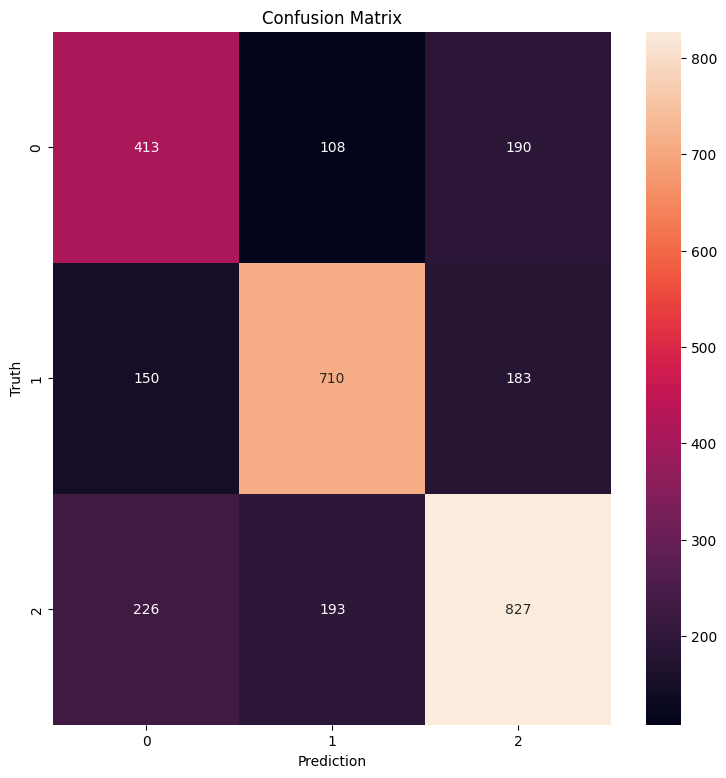

In [39]:
import matplotlib.pyplot as plt
import seaborn as sn

font = {'family':'fantasy','color':'blue','size':20}
plt.figure(figsize=(9,9), edgecolor='red')
sn.heatmap(cm , annot= True, fmt="d")
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()